In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

In [17]:
# Load the dataset
csv_path = "bank-full.csv"

# Read CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path, sep=";")


In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
# Features of this dataset
x = df[['age', 'duration', 'campaign', 'pdays', 'previous']]

In [23]:
# Conversion of categorical variable 'poutcome' to numeric using Label Encoder
label_encoder = preprocessing.LabelEncoder()
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

In [24]:
# Target variable
y = df["y"]

In [25]:
# Splitting the dataset into training and testing sets
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.2, random_state=50)

In [26]:
# Decision Tree Classifier
yTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
# Fitting the data with the training feature matrix and training response vector
yTree.fit(x_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
# Predictions
predTree = yTree.predict(x_testset)

In [29]:
# Evaluation
accuracy = metrics.accuracy_score(y_testset, predTree)
print("Decision Tree's Accuracy is:", accuracy)

Decision Tree's Accuracy is: 0.8929558774742895


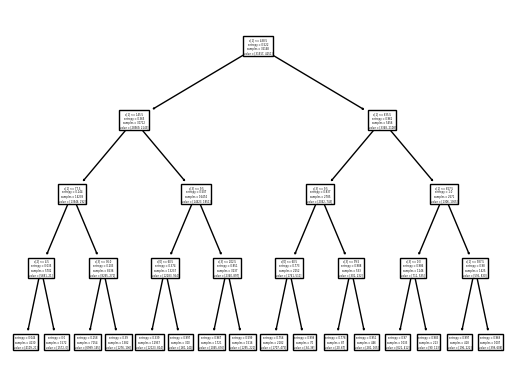

In [30]:
# Visualization
tree.plot_tree(yTree)
plt.show()